<a href="https://colab.research.google.com/github/anubhavgupta1/Dive-Into-Deep-Learning/blob/main/Linear%20Regression/Implementation%20from%20Scratch/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
!pip install d2l==0.16.1

     |████████████████████████████████| 81kB 4.7MB/s 


In [2]:
%matplotlib inline
from d2l import tensorflow as d2l
import tensorflow as tf
import random

### Generating the Dataset

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [4]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([0.658792 1.906547], shape=(2,), dtype=float32) 
label: tf.Tensor([-0.9785376], shape=(1,), dtype=float32)


In [6]:
features[:, (1)].shape

TensorShape([1000])

### Plot The data

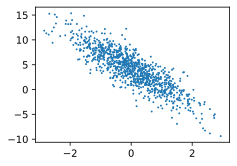

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

### Reading the Dataset

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.13396913  0.21929747]
 [ 0.56938034  1.4953812 ]
 [-0.3525702  -0.31680685]
 [-0.36273426 -0.04013081]
 [-0.5046572  -1.2154754 ]
 [-0.5320503   0.58978045]
 [-1.3893954  -0.25950646]
 [-1.252329   -0.5049817 ]
 [-0.9810994   1.8766098 ]
 [-0.3678282  -0.9253801 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 3.737024  ]
 [ 0.24938962]
 [ 4.577692  ]
 [ 3.615772  ]
 [ 7.320975  ]
 [ 1.1295522 ]
 [ 2.3158157 ]
 [ 3.3939922 ]
 [-4.1542306 ]
 [ 6.6136465 ]], shape=(10, 1), dtype=float32)


###Initializing Model Parameters

In [10]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

### Defining the Model

In [11]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return tf.matmul(X, w) + b

### Defining the Loss Function

In [12]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

###Defining the Optimization Algorithm

In [13]:
def sgd(params, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

### Training

In [14]:
lr = 0.03
num_epochs = 50
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            y_hat = net(X, w, b)
            l = loss(y_hat, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    if(epoch==0 or epoch%10==9):
      print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.046138
epoch 10, loss 0.000047
epoch 20, loss 0.000047
epoch 30, loss 0.000047
epoch 40, loss 0.000047
epoch 50, loss 0.000047


In [15]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [-4.339218e-05 -7.774830e-04]
error in estimating b: [0.00040531]
